Download [this dataset](https://drive.google.com/file/d/1Irwl_iBBarUuZNiSesy7KK6v8ImCRPfx/view?usp=sharing) and do the following:

---------------------------------------------------------------------------------------------------------------------


Part 1: Classify the 'Results' column using three models of your choice.
At least one must get 90% accuracy with at least 50% precision with ten fold cross validation. Print your confusion matrix.

Read in the dataset:

In [1]:
import pandas as pd

df = pd.read_csv('homework4.csv')
data = df.drop(columns=['Unnamed: 0'])

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Results
0,-2.952927,1.184525,1.226833,-2.931165,-2.952927,-2.175042,-2.931165,-0.969470,-2.175042,-2.703467,-1.730694,0.674750,0
1,-2.391714,0.327538,0.876101,-2.734864,-2.391714,-1.747243,-2.734864,-1.153921,-1.747243,-1.688038,-1.551229,1.293129,0
2,-3.405944,0.540775,1.229768,-2.216754,-3.405944,-2.807417,-2.216754,-2.616736,-2.807417,-0.803270,0.872962,-0.728645,0
3,-0.699303,1.508910,-0.457514,0.043826,-0.699303,-0.892224,0.043826,-1.525033,-0.892224,0.406936,2.409556,-2.804476,0
4,-0.336467,1.690297,-1.058940,-0.340338,-0.336467,-0.036228,-0.340338,-1.671984,-0.036228,0.056554,1.708848,-1.761093,0


In [2]:
# Separate features (X) from the target (y)
X = data.drop(columns=['Results'])
y = data['Results']

Classify 'Results' column with Model #1:

In [3]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib, os

if not os.path.isfile("random_forest_model.pkl"):
    # Initialize Model #1: Random Forest
    random_forest_model = RandomForestClassifier(random_state=0)

    # Perform 10-fold cross-validation and calculate accuracy and precision
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    random_forest_accuracies = cross_val_score(random_forest_model, X, y, cv=kf, scoring='accuracy')
    random_forest_precisions = cross_val_score(random_forest_model, X, y, cv=kf, scoring='precision')
    
    data = {
        'Fold 1': [random_forest_accuracies[0], random_forest_precisions[0]],
        'Fold 2': [random_forest_accuracies[1], random_forest_precisions[1]],
        'Fold 3': [random_forest_accuracies[2], random_forest_precisions[2]],
        'Fold 4': [random_forest_accuracies[3], random_forest_precisions[3]],
        'Fold 5': [random_forest_accuracies[4], random_forest_precisions[4]],
        'Fold 6': [random_forest_accuracies[5], random_forest_precisions[5]],
        'Fold 7': [random_forest_accuracies[6], random_forest_precisions[6]],
        'Fold 8': [random_forest_accuracies[7], random_forest_precisions[7]],
        'Fold 9': [random_forest_accuracies[8], random_forest_precisions[8]],
        'Fold 10': [random_forest_accuracies[9], random_forest_precisions[9]],
        'Min': [random_forest_accuracies.min(), random_forest_precisions.min()],
        'Avg': [random_forest_accuracies.mean(), random_forest_precisions.mean()],
        'Max': [random_forest_accuracies.max(), random_forest_precisions.max()]
    }
    random_forest_results = pd.DataFrame(data, index=['Accuracy', 'Precision'])
    random_forest_results.to_csv('random_forest_results.csv', index=False)

    # Train and evaluate using the entire dataset to obtain confusion matrix
    random_forest_model.fit(X, y)
    joblib.dump(random_forest_model, 'random_forest_model.pkl')
    random_forest_y_pred = random_forest_model.predict(X)
    
    random_forest_conf_matrix = confusion_matrix(y, random_forest_y_pred)
    random_forest_cf = pd.DataFrame(
        random_forest_conf_matrix,
        index=['Actual Negative', 'Actual Positive'],
        columns=['Predicted Negative', 'Predicted Positive']
    )
    random_forest_cf.to_csv('random_forest_cf.csv', index=False)

In [21]:
res = pd.DataFrame()
if os.path.isfile("random_forest_results.csv"):
    res = pd.read_csv("random_forest_results.csv")
    res.index = ["Accuracy", "Precision"]
    res = res[['Min', 'Avg', 'Max']].round(3)
res

,Min,Avg,Max
Accuracy,0.905,0.913,0.922
Precision,0.808,0.873,0.921


In [26]:
cf = pd.DataFrame()
if os.path.isfile("random_forest_cf.csv"):
    cf = pd.read_csv("random_forest_cf.csv")
    cf.index = ["Accuracy", "Precision"]
cf

,Predicted Negative,Predicted Positive
Accuracy,8591,0
Precision,0,1409


Classify 'Results' column with Model #2:

In [6]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

if not os.path.isfile('knn_model.pkl'):
    # Initialize Model #2: Naive Bayes
    knn_model = KNeighborsClassifier()

    # Perform 10-fold cross-validation and calculate accuracy and precision
    kf = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)
    knn_accuracies = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')
    knn_precisions = cross_val_score(knn_model, X, y, cv=kf, scoring='precision')
    
    data = {
        'Fold 1': [knn_accuracies[0], knn_precisions[0]],
        'Fold 2': [knn_accuracies[1], knn_precisions[1]],
        'Fold 3': [knn_accuracies[2], knn_precisions[2]],
        'Fold 4': [knn_accuracies[3], knn_precisions[3]],
        'Fold 5': [knn_accuracies[4], knn_precisions[4]],
        'Fold 6': [knn_accuracies[5], knn_precisions[5]],
        'Fold 7': [knn_accuracies[6], knn_precisions[6]],
        'Fold 8': [knn_accuracies[7], knn_precisions[7]],
        'Fold 9': [knn_accuracies[8], knn_precisions[8]],
        'Fold 10': [knn_accuracies[9], knn_precisions[9]],
        'Min': [knn_accuracies.min(), knn_precisions.min()],
        'Avg': [knn_accuracies.mean(), knn_precisions.mean()],
        'Max': [knn_accuracies.max(), knn_precisions.max()]
    }
    knn_results = pd.DataFrame(data, index=['Accuracy', 'Precision'])
    knn_results.to_csv('knn_results.csv', index=False)

    # Train and evaluate using the entire dataset to obtain confusion matrix
    knn_model.fit(X, y)
    joblib.dump(knn_model, 'knn_model.pkl')
    knn_y_pred = knn_model.predict(X)

    knn_conf_matrix = confusion_matrix(y, knn_y_pred)
    knn_cf = pd.DataFrame(
        knn_conf_matrix,
        index=['Actual Negative', 'Actual Positive'],
        columns=['Predicted Negative', 'Predicted Positive']
    )
    knn_cf.to_csv('knn_cf.csv', index=False)

In [22]:
res = pd.DataFrame()
if os.path.isfile("knn_results.csv"):
    res = pd.read_csv("knn_results.csv")
    res.index = ["Accuracy", "Precision"]
    res = res[['Min', 'Avg', 'Max']].round(3)
res

,Min,Avg,Max
Accuracy,0.905,0.911,0.926
Precision,0.829,0.863,0.924


In [25]:
cf = pd.DataFrame()
if os.path.isfile("knn_cf.csv"):
    cf = pd.read_csv("knn_cf.csv")
    cf.index = ['Actual Negative', 'Actual Positive']
cf

,Predicted Negative,Predicted Positive
Actual Negative,8524,67
Actual Positive,719,690


Classify 'Results' column with Model #3:

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

if not os.path.isfile('neural_network_model.pkl'):
    # Initialize Model #3: Neural Network
    neural_network_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=0)

    # Perform 10-fold cross-validation and calculate accuracy and precision
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    neural_network_accuracies = cross_val_score(neural_network_model, X, y, cv=kf, scoring='accuracy')
    neural_network_precisions = cross_val_score(neural_network_model, X, y, cv=kf, scoring='precision')

    data = {
        'Fold 1': [neural_network_accuracies[0], neural_network_precisions[0]],
        'Fold 2': [neural_network_accuracies[1], neural_network_precisions[1]],
        'Fold 3': [neural_network_accuracies[2], neural_network_precisions[2]],
        'Fold 4': [neural_network_accuracies[3], neural_network_precisions[3]],
        'Fold 5': [neural_network_accuracies[4], neural_network_precisions[4]],
        'Fold 6': [neural_network_accuracies[5], neural_network_precisions[5]],
        'Fold 7': [neural_network_accuracies[6], neural_network_precisions[6]],
        'Fold 8': [neural_network_accuracies[7], neural_network_precisions[7]],
        'Fold 9': [neural_network_accuracies[8], neural_network_precisions[8]],
        'Fold 10': [neural_network_accuracies[9], neural_network_precisions[9]],
        'Min': [neural_network_accuracies.min(), neural_network_precisions.min()],
        'Avg': [neural_network_accuracies.mean(), neural_network_precisions.mean()],
        'Max': [neural_network_accuracies.max(), neural_network_precisions.max()]
    }
    neural_network_results = pd.DataFrame(data, index=['Accuracy', 'Precision'])
    neural_network_results.to_csv('neural_network_results.csv', index=False)

    # Train and evaluate using the entire dataset to obtain confusion matrix
    neural_network_model.fit(X, y)
    joblib.dump(neural_network_model, 'neural_network_model.pkl')
    neural_network_y_pred = neural_network_model.predict(X)
    
    neural_network_conf_matrix = confusion_matrix(y, neural_network_y_pred)
    neural_network_cf = pd.DataFrame(
        neural_network_conf_matrix,
        index=['Actual Negative', 'Actual Positive'],
        columns=['Predicted Negative', 'Predicted Positive']
    )
    neural_network_cf.to_csv('neural_network_cf.csv', index=False)

In [23]:
res = pd.DataFrame()
if os.path.isfile("neural_network_results.csv"):
    res = pd.read_csv("neural_network_results.csv")
    res.index = ["Accuracy", "Precision"]
    res = res[['Min', 'Avg', 'Max']].round(3)
res

,Min,Avg,Max
Accuracy,0.907,0.914,0.926
Precision,0.843,0.888,0.932


In [24]:
cf = pd.DataFrame()
if os.path.isfile("neural_network_cf.csv"):
    cf = pd.read_csv("neural_network_cf.csv")
    cf.index = ['Actual Negative', 'Actual Positive']
cf

,Predicted Negative,Predicted Positive
Actual Negative,8514,77
Actual Positive,761,648


---------------------------------------------------------------------------------------------------------------------


Part 2: Run PCA and discover how many dimensions you can reduce the problem to before you start seeing significant decreases in accuracy.

Run PCA:

In [14]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from concurrent.futures import ThreadPoolExecutor, as_completed

resutls_df = pd.DataFrame()

if not os.path.isfile('pca_accuracies.csv'):
    models = {
        "RandomForest": RandomForestClassifier(random_state=0),
        "KNN": KNeighborsClassifier(),
        "MLP": MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=0)
    }
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

    def evaluate_model_with_pca(model_name, model, n_components):
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X)  # Transform the features with PCA
        accuracy = cross_val_score(model, X_pca, y, cv=kf, scoring='accuracy').mean()
        return model_name, n_components, accuracy

    # Run cross-validation for each model in parallel
    results = {model_name: [] for model_name in models.keys()}
    with ThreadPoolExecutor() as executor:
        futures = []
        for model_name, model in models.items():
            for n_components in range(1, X.shape[1] + 1):
                futures.append(executor.submit(evaluate_model_with_pca, model_name, model, n_components))
        
        for future in as_completed(futures):
            model_name, n_components, accuracy = future.result()
            results[model_name].append((n_components, accuracy))

    # Convert results to a DataFrame with models as index and PCA components as columns
    data = {}
    for model_name, scores in results.items():
        scores_sorted = sorted(scores, key=lambda x: x[0]) 
        accuracies = [score[1] for score in scores_sorted]
        data[model_name] = accuracies

    pca_dims = [f"Dim_{i}" for i in range(1, X.shape[1] + 1)]
    results_df = pd.DataFrame(data, index=pca_dims).T
    results_df.to_csv("pca_accuracies.csv")
else:
    results_df = pd.read_csv('pca_accuracies.csv', index_col='Unnamed: 0')
    
results_df

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7,Dim_8,Dim_9,Dim_10,Dim_11,Dim_12
RandomForest,0.7664,0.8908,0.8994,0.9051,0.9095,0.9099,0.9097,0.9103,0.9104,0.9096,0.9102,0.9101
KNN,0.8387,0.8906,0.8946,0.9046,0.9108,0.9108,0.9108,0.9108,0.9108,0.9108,0.9108,0.9108
MLP,0.8591,0.8991,0.9018,0.9082,0.9144,0.9145,0.9150,0.9146,0.9141,0.9137,0.9144,0.9138


How many dimensions can you reduce? (Explain your answer)

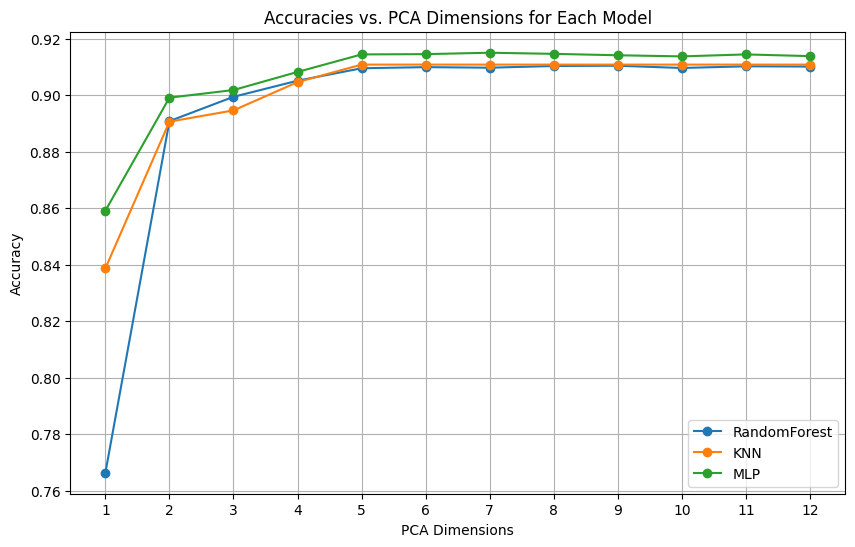

In [20]:
import matplotlib.pyplot as plt

pca_dimensions = list(range(1, 13))

# Plot accuracies vs. PCA dimensions for each model
plt.figure(figsize=(10, 6))
for model_name, accuracies in results_df.T.to_dict('list').items():
    plt.plot(pca_dimensions, accuracies, marker='o', label=model_name)

plt.xlabel("PCA Dimensions")
plt.ylabel("Accuracy")
plt.xticks(pca_dimensions)
plt.title("Accuracies vs. PCA Dimensions for Each Model")
plt.legend()
plt.grid(True)
plt.show()

After running PCA with Ten-Fold Cross Validation on the RandomForest, KNN, and MLP classifiers, we observe consistent accuracy when reducing up to 4-5 dimensions, indicating that the models retain high performance with this level of reduction. When reducing 6-10 dimensions, there is a slight drop in accuracy, though it remains relatively stable. However, reducing 11 dimensions (leaving only 1 feature) leads to a significant drop in accuracy, showing that too much information is lost. This analysis suggests that we can reduce up to 4-5 dimensions confidently, with some tolerance up to 10, before experiencing a major impact on prediction accuracy.